# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Constant False Alaram Rate (CFAR) Detection
***

Fixed value thresholds satisfy the condition on the probability of false alarm as long as the noise power is constant.  However, in practical systems, factors such as clutter, interfering sources, and nearby targets cause the noise level to change both spatially and temporally.  Therefore, a continuously changing threshold is needed where the threshold is raised or lowered to maintain a constant probability of false alarm.  This is typically referred to as ***constant false alarm rate*** (CFAR) processing.  CFAR lowers the number of false alarms the radar system must process but may also prevent the detection of some targets.  A fundamental circuit for CFAR processing was first described in 1968 by Finn and Johnson.  While the term CFAR processing refers to a common form of adaptive algorithms used to detect target returns against a background of noise, clutter, and interference, there are several approaches to accomplish this. This example presents some of the more common CFAR techniques.
***

Begin by getting the library path

In [1]:
import lib_path

Generate a sample signal to be used (later used matched filter output) using the `random` routines from `scipy`

In [2]:
from numpy import sqrt, random as rnd

number_of_samples = 1000

i_noise = rnd.normal(0, 0.05, number_of_samples)

q_noise = rnd.normal(0, 0.05, number_of_samples)

noise_signal = sqrt(i_noise ** 2 + q_noise ** 2)

Create the time array using the `linspace` routine from `scipy`

In [3]:
from numpy import linspace

t = linspace(0.0, 1.0, number_of_samples)

Create example signal for the CFAR process

In [4]:
from numpy import sin, cos, finfo

from scipy import fftpack

from scipy.constants import pi


s1 = 0.4 * cos(2 * pi * 600 * t) + 1j * 0.4 * sin(2 * pi * 600 * t)

s2 = 0.1 * cos(2 * pi * 150 * t) + 1j * 0.1 * sin(2 * pi * 150 * t)

s3 = 0.2 * cos(2 * pi * 100 * t) + 1j * 0.2 * sin(2 * pi * 100 * t)


signal = abs(fftpack.fft(s1 + s2 + s3 + noise_signal)) + finfo(float).eps

signal[0] = 0

Set the CFAR type (Cell Averaging, Cell Averaging Greatest Of, Cell Averaging Smallest Of, Ordered Statistic), the number of guard cells, number of reference cells, and the bias (dB)

In [5]:
cfar_type = 'Cell Averaging'

guard_cells = 8

reference_cells = 16

bias = 4

Set up the keyword args

In [6]:
kwargs = {'signal': signal,

          'guard_cells': guard_cells,

          'reference_cells': reference_cells,

          'bias': bias,

          'cfar_type': cfar_type}

Calculate the CFAR threshold using the `cfar` routine

In [7]:
from Libs.detection.cfar import cfar

cfar_threshold = cfar(**kwargs)

Display the CFAR threshold using the `matplotlib` routines

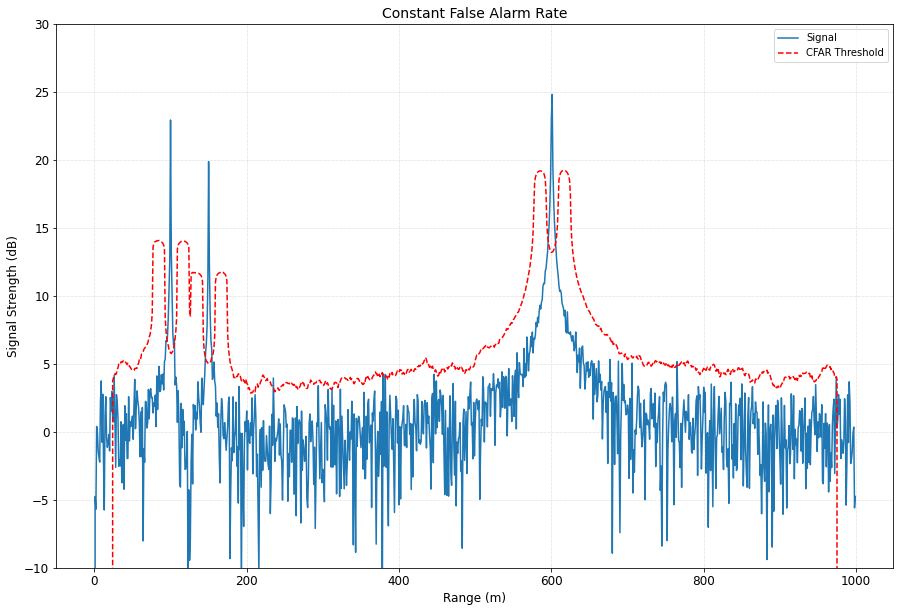

In [8]:
from matplotlib import pyplot as plt

from numpy import log10

import sys



# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(10.0 * log10(signal + sys.float_info.min), '', label='Signal')

plt.plot(cfar_threshold, 'r--', label='CFAR Threshold')



# Set the plot title and labels

plt.title('Constant False Alarm Rate', size=14)

plt.ylabel('Signal Strength (dB)', size=12)

plt.xlabel('Range (m)', size=12)

plt.ylim(-10, 30)



# Set the tick label size

plt.tick_params(labelsize=12)



# Set the legend

plt.legend(loc='upper right', prop={'size': 10})



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)